In [1]:
import numpy as np
import scipy.linalg as sp
import matplotlib.pyplot as plt

вариант = len('МезенцевГлебВладимирович')%30
вариант

24

![](img/5_0.png)
![](img/5_1.png)

## Задание 5.1 (5.1.24)
![](img/5_2.png)
![](img/5_3.png)
![](img/5_4.png)

### Задаём условие

In [2]:
x = np.arange(5.5, 8.75, 0.25)
y = np.array([1.542, 0.652, -0.008, -0.620, -0.751, -1.183, -1.229, -1.139, -0.770, -0.586, -0.066, 0.633, 1.542])
x.shape, y.shape

((13,), (13,))

### Составляем систему МНК,
### решаем её для разных степеней многочлена m и находим значения sigma_m

In [3]:
def mnk(x, y, m):
    A = np.array([[x[i]**j for j in range(m+1)] for i in range(x.shape[0])])
    w = np.linalg.solve(A.T@A, A.T@y)
    return w

def sigma(polynomial, x, y, w):
    return np.sum((polynomial(x, w)-y)**2)/(x.shape[0] - w.shape[0])
sigma = np.vectorize(sigma, excluded=[0,1,2])

def polynomial(x, weights):
    res = 0
    for pow, w in enumerate(weights):
        res += w * x**pow
    return res
polynomial = np.vectorize(polynomial, excluded=[1])

m_grid = np.arange(0, 5, 1)

sigma_grid = sigma(polynomial, x, y, [mnk(x, y, m) for m in m_grid])

### Исследуем зависимость sigma_m от m

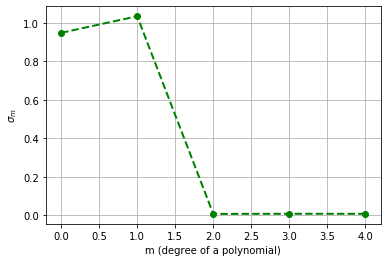

In [4]:
plt.plot(m_grid, sigma_grid, color='green', marker='o', linestyle='dashed', linewidth=2, markersize = 6)
plt.xlabel('m (degree of a polynomial)')
plt.ylabel('$\sigma_m$');
plt.grid()

### Вывод: оптимальная степень многочлена - 2

### Построим графики полученных многочленов

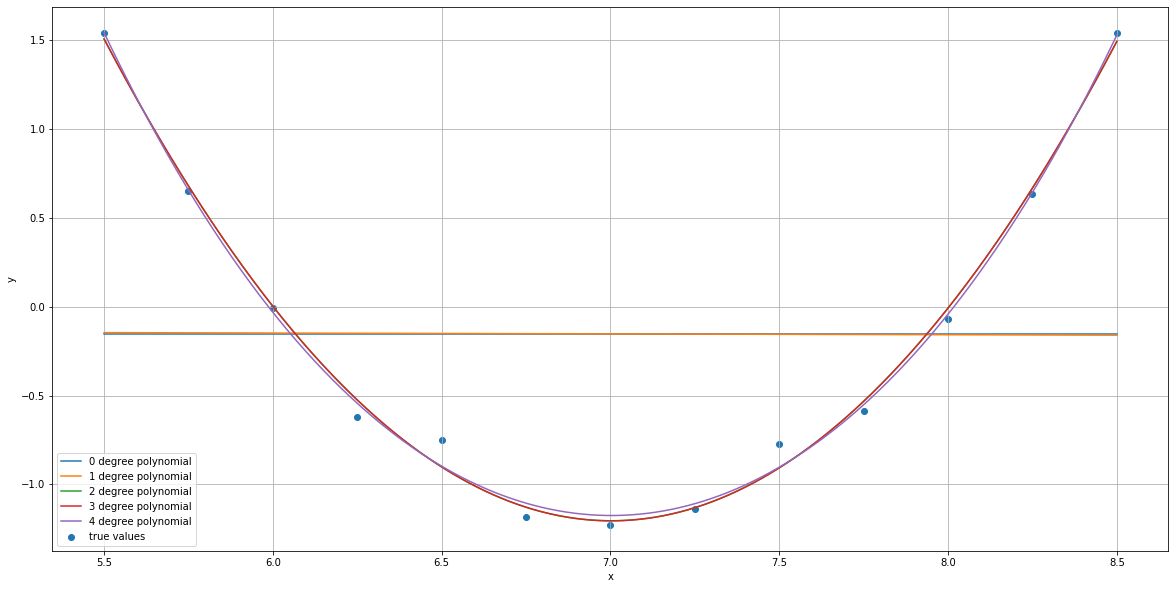

In [5]:
plt.figure(figsize=(20,10))
plt.scatter(x, y, label = 'true values')

for m in m_grid:
    x_grid = np.linspace(x[0], x[-1], 1000)
    y_grid = polynomial(x_grid, mnk(x, y, m))
    plt.plot(x_grid, y_grid, label = str(m)+' degree polynomial')
    
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

### МНК с использованием QR-разложения

$A^TAw = A^Ty$

$A = QR$

$A^T = R^TQ^T$

$A^TA = R^TQ^TQR = R^TR$

$R^TRw =  R^TQ^Ty$

$Rw =  Q^Ty$

In [6]:
def mnk_QR(x, y, m):
    A = np.array([[x[i]**j for j in range(m+1)] for i in range(x.shape[0])])
    Q, R = np.linalg.qr(A)
    w = sp.solve_triangular(R, Q.T@y)
    return w

np.allclose(mnk(x, y, 2), mnk_QR(x, y, 2))

True

### Результаты совпадают

## Задание 5.2 (5.2.5)
![](img/5_5.png)
![](img/5_6.png)

### Задаём условие

In [7]:
t = np.array([2, 3.2, 4.4, 5, 5.6, 6.8, 7.4, 8])
x = np.array([18.50, 35.73, 54.65, 62.4, 71.74, 90.5, 98.10, 107.6])

### Найдём решения МНК для полинома первой степени

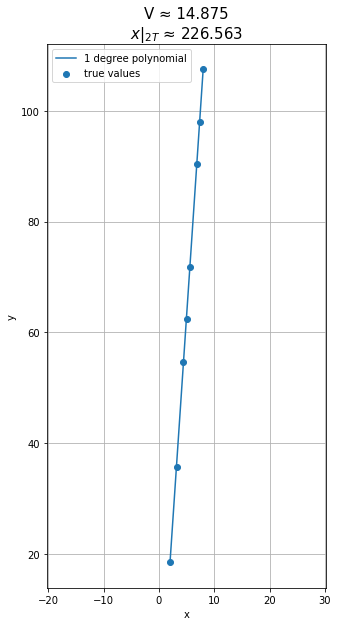

In [8]:
plt.figure(figsize=(5,10))
plt.scatter(t, x, label = 'true values')

m = 1
w = mnk(t, x, m)
x_grid = np.linspace(t[0], t[-1], 2)
y_grid = polynomial(x_grid, w)
plt.plot(x_grid, y_grid, label = str(m)+' degree polynomial')
    
plt.title('V ≈ '+str(round(w[1], 3))+'\n$x|_{2T}$ ≈ '+str(np.round(polynomial(2 * t[-1], w), 3)), {'fontsize':15})
plt.legend()
plt.axis('equal')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()

## Задание 5.7 (5.7.3)
![](img/5_7.png)
![](img/5_8.png)
![](img/5_9.png)

### Задаём условие

In [9]:
f = np.vectorize(lambda x: 1 / (1 + 2 * abs(x)))
a, b = -2, 2

### Вычислим значение функции в равномерно распределённых k точках отрезка

In [10]:
k = 10
x_grid = np.append(np.random.uniform(a+0.001, b-0.001, k-2), [a, b])
x_grid.sort()
y_grid = f(x_grid)

### Напишем функцию вычисяющую значение интерполяционного многочлена первой степени, построенного по двум точкам, в промежуточной точке

In [11]:
def interpolate_poly(xl, yl, xr, yr, x):
    return (yr - yl)/(xr - xl)*x - (yr - yl)/(xr - xl)*xl + yl

### Вычисляем с её помощью приближенное значения функции в 3k равномерно распределённых точках отрезка

In [12]:
x_grid_int = np.random.uniform(-2, 2, 3*k)
x_grid_int.sort()
y_grid_int = [interpolate_poly(x_grid[i], y_grid[i], x_grid[j], y_grid[j], x_grid_int[k])
            for (k, (i, j)) in enumerate(
                [(np.where(x_grid < x)[0][-1], np.where(x_grid > x)[0][0]) for x in x_grid_int])]

### Напишем функцию, выполняющую построению интерполяционного многочлена Ньютона

In [13]:
# вычисление разделённой разности
def div_dif(ind, x, y):
    if len(ind) == 1:
        return y[ind[0]]
    elif len(ind) == 2:
        return (y[ind[1]] - y[ind[0]])/(x[ind[1]] - x[ind[0]])
    else:
        return (div_dif(ind[1:], x, y) - div_dif(ind[:-1], x, y))/(x[ind[-1]] - x[ind[0]])

# вычисление коэффициентов для многочлена Ньютона    
def w(k, x_grid, x):
    if k == 0:
        return 1
    else:
        return np.prod([(x - x_grid[i]) for i in range(k)])

class NewtonInterpolator:    
    def __init__(self):
        self.predict = np.vectorize(self.predict)
    
    # построение многочлена Ньютона
    def fit(self, x_grid, y_grid):
        self.div_difs = np.array([div_dif(list(range(i+1)), x_grid, y_grid) for i in range(x_grid.shape[0])])
        
    # вычисление значения многочлена Ньютона в точке x    
    def predict(self, x):
        ws = np.array([w(i, x_grid, x) for i in range(x_grid.shape[0])])
        return np.sum(self.div_difs * ws)

### Вычисляем приближенное значения функции в тех же 3k точках отрезка с помощью глобальной интерполяции (многочлен Ньютона)

In [14]:
Newton = NewtonInterpolator()
Newton.fit(x_grid, y_grid)
y_grid_int_newton = Newton.predict(x_grid_int)

### Построим графики исходной функции, интерполяционных функций и точки интерполяции

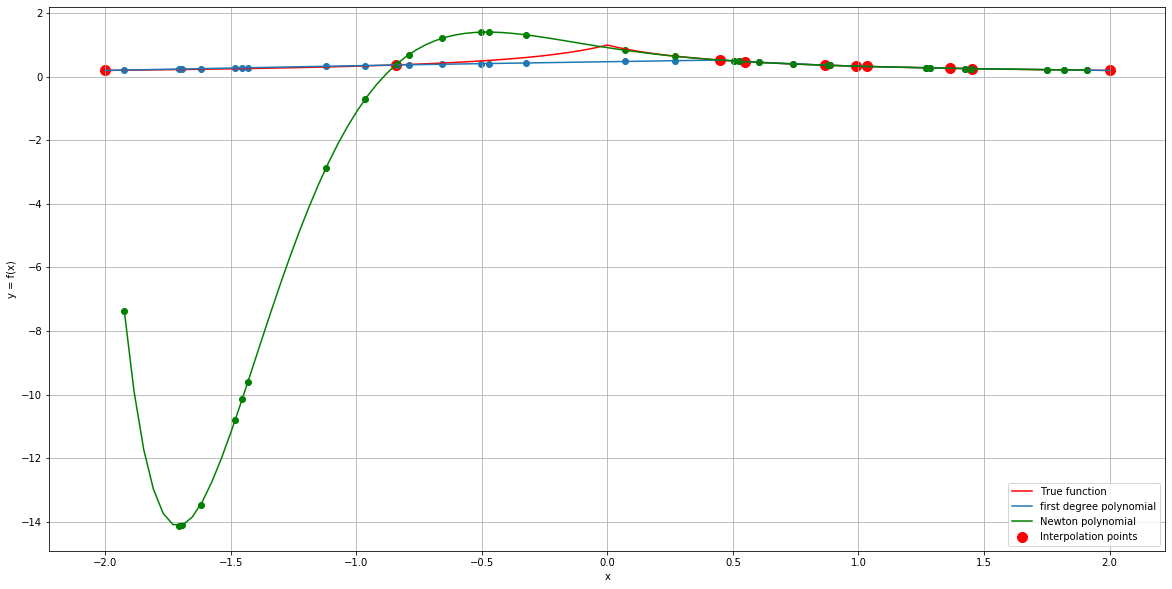

In [15]:
plt.figure(figsize=(20,10))

plotting_x_grid = np.linspace(a, b, 1000)
plotting_y_grid = f(plotting_x_grid)
plt.plot(plotting_x_grid, plotting_y_grid, c = 'r', label = 'True function')
plt.scatter(x_grid, y_grid, c = 'r', s = 100, marker = 'o', label = 'Interpolation points')

plt.scatter(x_grid_int, y_grid_int, marker='o')
plt.plot(x_grid, y_grid, label = 'first degree polynomial');

plt.scatter(x_grid_int, y_grid_int_newton, marker='o', c='g')

plotting_x_grid = np.linspace(x_grid_int[0], x_grid_int[-1], 100)
plotting_y_grid = Newton.predict(plotting_x_grid)
plt.plot(plotting_x_grid, plotting_y_grid, c = 'g', label = 'Newton polynomial');

plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.grid()
plt.legend();

### Можно наблюдать феномен Рунге (осцилляция около границы интервала интерполяции)

### Вычислим практическую величину погрешности для обоих интерполяторов и построим графики

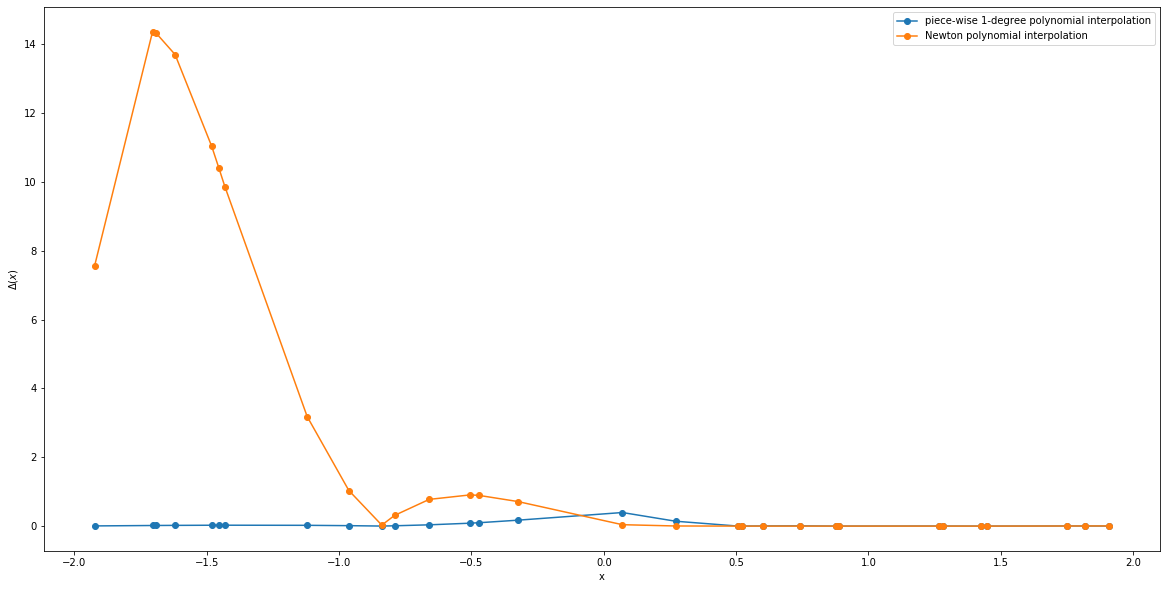

In [16]:
y_grid_true = f(x_grid_int)
d_piece = np.abs(y_grid_int - y_grid_true)
d_newton = np.abs(y_grid_int_newton - y_grid_true)

plt.figure(figsize=(20,10))
plt.plot(x_grid_int, d_piece, 'o-', label = 'piece-wise 1-degree polynomial interpolation')
plt.plot(x_grid_int, d_newton, 'o-', label = 'Newton polynomial interpolation')

plt.xlabel('x')
plt.ylabel('$\Delta(x)$')
plt.legend();

## Задание 5.9 (5.9.12)
![](img/5_10.png)
![](img/5_11.png)
![](img/5_12.png)

### Задаём условие

In [17]:
f = np.vectorize(lambda x: 10 * np.cos(x) / x)
a = 3
b = 5

### Реализуем метод интерполяции кубическим сплайном

In [18]:
class CubicSpline:
    
    def __init__(self):
        self.predict = np.vectorize(self.predict)
        
    # простроение многочлена
    def fit(self, x_grid, y_grid):
        
        self.x_grid = x_grid
        self.y_grid = y_grid

        h_grid = x_grid[1:] - x_grid[:-1]
        d_grid = (y_grid[1:] - y_grid[:-1]) / h_grid

        d = np.array([h_grid[1]])
        d = np.append(d, 2 * (h_grid[:-1] + h_grid[1:]))
        d = np.append(d, np.array([h_grid[-2]]))

        d_l = np.copy(h_grid[:-1])
        d_l = np.append(d_l, -(h_grid[-1] + h_grid[-2]))

        d_ll = np.zeros(x_grid.shape[0]-3)
        d_ll = np.append(d_ll, h_grid[-1])

        d_u = np.array([-(h_grid[0] + h_grid[1])])
        d_u = np.append(d_u, h_grid[1:])

        d_uu = np.array([h_grid[0]])
        d_uu = np.append(d_uu, np.zeros(x_grid.shape[0]-3))

        A = np.diag(d) + np.diag(d_u, 1) + np.diag(d_uu, 2) + np.diag(d_l, -1) + np.diag(d_ll, -2)

        b = np.array([0])
        b = np.append(b, 6 * (d_grid[1:] - d_grid[:-1]))
        b = np.append(b, np.array([0]))

        self.m = np.linalg.solve(A, b)

        self.s0 = y_grid[:-1]
        self.s1 = d_grid - h_grid / 6 * (2 * self.m[:-1] + self.m[1:])
        self.s2 = self.m[:-1] / 2
        self.s3 = (self.m[1:] - self.m[:-1]) / (6 * h_grid)
        
    # вычисление значения многочлена в точке    
    def predict(self, x):

        ind = np.where(x < self.x_grid)[0]
        if ind.shape[0] != 0:
            ind = ind[0]
            if ind != 0:
                ind = ind - 1
        else:
            ind = self.s0.shape[0] - 1

        return self.s0[ind] + self.s1[ind] * (x - self.x_grid[ind]) + self.s2[ind] * (x - self.x_grid[ind])**2 + self.s3[ind] * (x - self.x_grid[ind])**3

### Вычислим значение функции в равномерно распределённых k точках отрезка

In [19]:
k = 10
x_grid = np.append(np.random.uniform(a+0.01, b-0.01, k-2), [a, b])
x_grid.sort()
y_grid = f(x_grid)

Spline = CubicSpline()
Spline.fit(x_grid, y_grid)

Newton = NewtonInterpolator()
Newton.fit(x_grid, y_grid)

### Построим графики исходной функции, интерполяционной функции и точки интерполяции

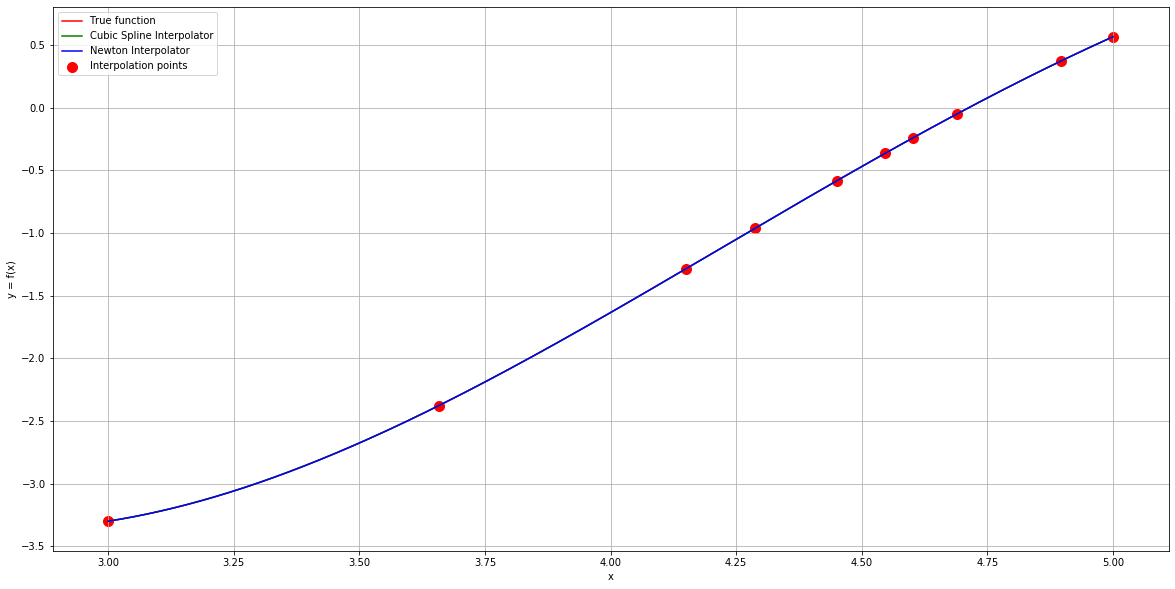

In [20]:
plt.figure(figsize=(20,10))

plotting_x_grid = np.linspace(a, b, 1000)
plotting_y_grid = f(plotting_x_grid)
plt.plot(plotting_x_grid, plotting_y_grid, c = 'r', label = 'True function')
plt.scatter(x_grid, y_grid, c = 'r', s = 100, marker = 'o', label = 'Interpolation points')


plotting_x_grid = np.linspace(a, b, 1000)
plotting_y_grid = Spline.predict(plotting_x_grid)
plt.plot(plotting_x_grid, plotting_y_grid, c = 'g', label = 'Cubic Spline Interpolator');

plotting_y_grid = Newton.predict(plotting_x_grid)
plt.plot(plotting_x_grid, plotting_y_grid, c = 'b', label = 'Newton Interpolator');

plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.grid()
plt.legend();

### Построим график завистимости максимума отклонения истинного значения функции от значения интерполирующей функции

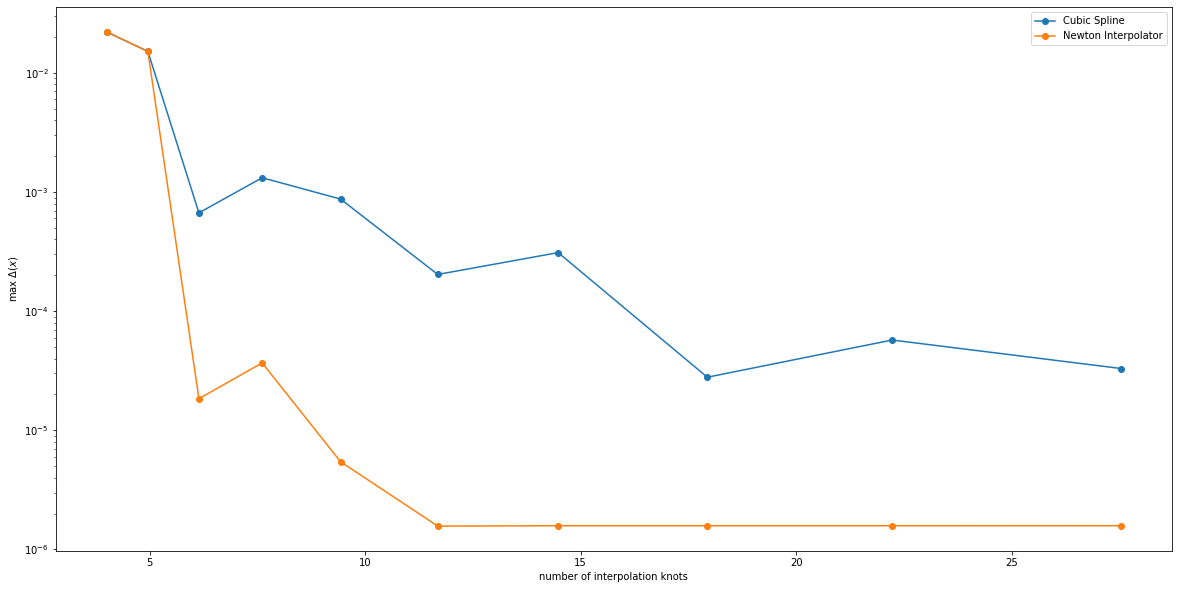

In [21]:
plt.figure(figsize=(20,10))

d_spline = []
d_Newton = []

Spline = CubicSpline()
Newton = NewtonInterpolator()
maxn = 1.44
nmb = 10

for n in np.logspace(np.log10(4), maxn,  nmb):
    k = int(n)
    x_grid = np.append(np.random.uniform(a+0.01, b-0.01, k-2), [a, b])
    x_grid.sort()
    y_grid = f(x_grid)
    
    Spline.fit(x_grid, y_grid)
    Newton.fit(x_grid, y_grid)

    d_spline.append(np.max(np.abs(plotting_y_grid - Spline.predict(plotting_x_grid))))
    d_Newton.append(np.max(np.abs(plotting_y_grid - Newton.predict(plotting_x_grid))))

plt.plot(np.logspace(np.log10(4), maxn, nmb), d_spline, marker = 'o', label = 'Cubic Spline')
plt.plot(np.logspace(np.log10(4), maxn, nmb), d_Newton, marker = 'o', label = 'Newton Interpolator')

plt.xlabel('number of interpolation knots')
plt.yscale('log')
plt.legend()
plt.ylabel('max $\Delta(x)$');

### Видно, что минимум ошибки достигается приблизительно при 20 узлах интерполяции для сплайна и 10 узлах для интерполятора Ньютона, а при большем их числе качество не улучшается